## Лабораторная работа 3
### Классификация в sklearn. Метрики классификации
### Выполнил: 6131-010302D, Пчелкина Юлия Жиганшевна

###  0. Набор данных

Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve


Моллюск (морское ушко)

Возраст морского ушка определяют, разрезая раковину через конус, окрашивая ее и подсчитывая количество колец под микроскопом.

Для предсказания возраста используются и другие измерения (которые легче получить). 

In [3]:
df = pd.read_csv('abalone.csv', sep=',')

In [4]:
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Столбцы:

- Sex - Пол (мужской, женский, ребенок). Категориальный признак.

- Length - Длина (самое длинный замер раковины). Вещественный тип.

- Diameter - Диаметр (замеряется перпендикулярно длине). Вещественный тип.

- Height - Высота (моллюск с панцирем). Вещественный тип.

- WholeWeight - Полный вес. Вещественный тип.

- ShuckedWeight - Вес моллюска (без раковины). Вещественный тип.

- VisceraWeight - Вес внутренностей моллюска (после "кровотечения"). Вещественный тип.

- ShellWeight - Вес корпуса (после сушки). Вещественный тип.

- Rings - Кольца (дает возраст в годах). Целочисленный тип.

## 1. Многоклассовая классификация:

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

1.2. То же самое с использованием кросс-валидации

1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор).


__Метрики__

Ошибка первого рода - __false positive error (FP)__, так же называют "ложная тревога", когда гипотеза принимается, хотя на самом деле она не верна.

Ошибка второго рода - __false negative error (FN)__, так же называют "пропуск цели", когда гипотеза отвергается, хотя на самом деле она верна.


__True positive (TP)__ - Верно принятые гипотезы.

__True negative (TN)__ - Верно отвергнутые гипотезы.



$$\ accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [5]:
# столбец с полом убираем, работаем только с числовыми, к тому же он не особо информативный для определения возраста
# заменим столбец с количеством колец на столбец с " условным возрастом"
# Делим всех малюсков на 3 возрастные категории

df['Age'] = df.apply(lambda row: round(row['Rings']/12) + 1, axis = 1)
df1 = df.drop(columns = ['Rings', 'Sex'], axis = 1)
df1.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,2


In [6]:
df1['Age'].value_counts()

2    3593
1     448
3     136
Name: Age, dtype: int64

In [7]:
# можем визуально оценить разделение по трем классам
#sns.pairplot(df1, hue="Age")

In [8]:
# Разделим набор данных на независимые и зависимые переменные. 
# Первые 7 столбцов являются независимыми переменными
# Cтолбец "Age" - будет зависимой переменной. 
# Сохраняем как массив

X = df1.iloc[:, 0:7].values
Y = df1.iloc[:, 7].values

In [9]:
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [10]:
Y

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [11]:
# поделили на обучающую и тестовую выборки 1:3

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)

In [12]:
X_train.shape, X_test.shape

((3132, 7), (1045, 7))

In [13]:
len(Y_train), len(Y_test)

(3132, 1045)

In [14]:
# проверка точности
def evaluate(P, T):
    # P - Предсказанные значение
    # T - Истинные значения
    # accuracy = correct predictions / all predictions
    accuracy = np.mean(P == T)
    print(accuracy*100, '%')

#### "Случайный лес". Параметры:

- n_estimators - число деревьев в классификации случайных лесов. 
- критерий - функция потерь (джини или энтропия)
- random_state - начальное значение, используемое генератором случайных состояний для рандомизации набора данных.


In [15]:
# обучение
model_Tree = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
model_Tree.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [16]:
import skimage
from skimage import transform

In [17]:
Y_Tree = model_Tree.predict(X_test)

In [18]:
compare = np.vstack([Y_Tree, Y_test]).T
compare

array([[2, 2],
       [2, 2],
       [2, 2],
       ...,
       [1, 1],
       [2, 2],
       [2, 2]], dtype=int64)

In [19]:
# Вычисление матрицы ошибок
# (i, j) элементы матрицы показывают число элементов класса `i` отнесённых классификатором к классу `j`
# i - строки
# j - столбцы
conf_mat_Tree = confusion_matrix(Y_test, Y_Tree)
conf_mat_Tree

array([[ 69,  58,   0],
       [ 37, 841,   3],
       [  0,  37,   0]], dtype=int64)

<AxesSubplot:>

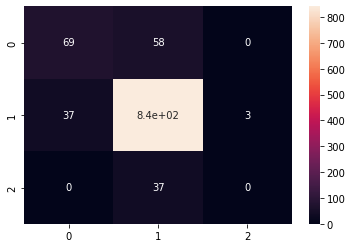

In [20]:
# Визуализация матрицы ошибок
sns.heatmap(conf_mat_Tree, annot=True)

In [21]:
# точность
evaluate(Y_Tree, Y_test)

87.08133971291866 %


In [22]:
# accuracy
accuracy_score(Y_test, Y_Tree) * 100

87.08133971291866

In [23]:
report_Tree = classification_report(Y_test, Y_Tree)
print(report_Tree)

              precision    recall  f1-score   support

           1       0.65      0.54      0.59       127
           2       0.90      0.95      0.93       881
           3       0.00      0.00      0.00        37

    accuracy                           0.87      1045
   macro avg       0.52      0.50      0.51      1045
weighted avg       0.84      0.87      0.85      1045



#### Байесовский классификатор

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
# Инициализиуем классификатор
model_Gauss = GaussianNB()

In [26]:
# обучаем
model_Gauss.fit(X_train, Y_train)

GaussianNB()

In [27]:
Y_Gauss = model_Gauss.predict(X_test)

In [28]:
# точность
evaluate(Y_Gauss, Y_test)

71.57894736842105 %


In [29]:
# Вычисление матрицы ошибок
conf_mat_Gauss = confusion_matrix(Y_test, Y_Gauss)
conf_mat_Gauss

array([[115,  12,   0],
       [135, 615, 131],
       [  0,  19,  18]], dtype=int64)

<AxesSubplot:>

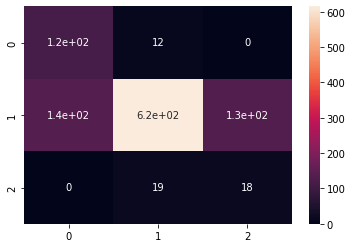

In [30]:
# Визуализация матрицы ошибок
sns.heatmap(conf_mat_Gauss, annot=True)

In [31]:
# точность
evaluate(Y_Gauss, Y_test)

71.57894736842105 %


In [32]:
# accuracy 
accuracy_score(Y_test, Y_Gauss) * 100

71.57894736842105

In [33]:
report_Gauss = classification_report(Y_test, Y_Gauss)
print(report_Gauss)

              precision    recall  f1-score   support

           1       0.46      0.91      0.61       127
           2       0.95      0.70      0.81       881
           3       0.12      0.49      0.19        37

    accuracy                           0.72      1045
   macro avg       0.51      0.70      0.54      1045
weighted avg       0.86      0.72      0.76      1045



#### K-соседей

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
# пусть для трёх соседей
   
model_KNN1 = KNeighborsClassifier(n_neighbors = 3)
    
model_KNN1.fit(X_train, Y_train)
Y_KNN = model_KNN1.predict(X_test)
  
accuracy_score(Y_test, Y_KNN) 

0.8669856459330143

In [36]:
# переберем разное количество сочедей, оценим точность

best_accur = 0
best_n = 0

for i in range(1, 60):
    best_model_KNN = KNeighborsClassifier(n_neighbors = i)
    best_model_KNN.fit(X_train, Y_train)
    pred_i = best_model_KNN.predict(X_test)
    accur = accuracy_score(Y_test, pred_i)
    if accur > best_accur:
        best_accur = accur
        best_n = i

In [37]:
# теперь для оптимального количества
   
model_KNN2 = KNeighborsClassifier(n_neighbors = best_n)
    
model_KNN2.fit(X_train, Y_train)
Y_KNN2 = model_KNN2.predict(X_test)

In [38]:
accuracy_score(Y_test, Y_KNN2) 

0.8851674641148325

In [39]:
# Вычисление матрицы ошибок
conf_mat_KNN = confusion_matrix(Y_test, Y_KNN)
conf_mat_KNN

array([[ 65,  62,   0],
       [ 37, 839,   5],
       [  0,  35,   2]], dtype=int64)

In [40]:
# масштабируем данные
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)


In [41]:
model_KNN3 = KNeighborsClassifier(n_neighbors = best_n)
    
model_KNN3.fit(X_train_M, Y_train)
Y_KNN3 = model_KNN3.predict(X_test_M)

In [42]:
accuracy_score(Y_test, Y_KNN3) 

0.8813397129186603

#### 2. Бинарная классификация.

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить classification_report

Для бинарной классификации рассмотрим только первый столбец исходного датасета.

Оставим только значения "F"  и "M"

In [43]:
df2 = df.query('Sex != "I"')

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logreg_clf = LogisticRegression()

In [46]:
X1 = df2.iloc[:, 1:8].values

Y1 = df2.iloc[:, 0].values

In [47]:
X1

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [48]:
Y1

array(['M', 'M', 'F', ..., 'M', 'F', 'M'], dtype=object)

In [49]:
# поделили на обучающую и тестовую выборки 1:3

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 21)

In [51]:
model_Log = LogisticRegression()
    
model_Log.fit(X1_train, Y1_train)
Y_Log = model_Log.predict(X1_test)
        
accuracy_score(Y1_test, Y_Log)

0.5416078984485191

In [52]:
conf_mat_Log = confusion_matrix(Y1_test, Y_Log)
conf_mat_Log

array([[ 80, 259],
       [ 66, 304]], dtype=int64)

In [53]:
report_Log = classification_report(Y1_test, Y_Log)
print(report_Log)

              precision    recall  f1-score   support

           F       0.55      0.24      0.33       339
           M       0.54      0.82      0.65       370

    accuracy                           0.54       709
   macro avg       0.54      0.53      0.49       709
weighted avg       0.54      0.54      0.50       709



In [54]:
# масштабируем данные
scaler = StandardScaler()
X1_train_M = scaler.fit_transform(X1_train)
X1_test_M = scaler.transform(X1_test)

In [56]:
model_Log1 = LogisticRegression()
    
model_Log1.fit(X1_train_M, Y1_train)
Y_Log1 = model_Log1.predict(X1_test_M)
        
accuracy_score(Y1_test, Y_Log1)

0.5627644569816643

#### 3. Использование нормализации признаков 

В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (StandardScalerили MinMaxScaler). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

Сделано (см. выше)

Не большая разница.

В случае бинарных значительно больше точность с нормированными признаками.